In [8]:
# Assignment 9 - Data Analytics III
# Problem Statement

# Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
# Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [32]:
data = data.drop(columns=['Id'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
le = LabelEncoder()

data['Species_encoded'] = le.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [34]:
print(data['Species'].unique())
print(data['Species_encoded'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


In [35]:
#Training Naive-Bayes Classification Algorithm

x = data.drop(columns=['Species', 'Species_encoded'])
y = data['Species_encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [39]:
y_pred = model.predict(x_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [46]:
# TP, TN, FP, FN for generalized Confusion Matrix
num = cm.shape[0]
results = []

for i in range(num):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - TP - FP - FN

    results.append({
        'class' : i,
        'TP' : TP,
        'FP' : FP,
        'FN' : FN,
        'TN' : TN
    })

for r in results:
    print(r)

{'class': 0, 'TP': np.int64(19), 'FP': np.int64(0), 'FN': np.int64(0), 'TN': np.int64(26)}
{'class': 1, 'TP': np.int64(12), 'FP': np.int64(0), 'FN': np.int64(1), 'TN': np.int64(32)}
{'class': 2, 'TP': np.int64(13), 'FP': np.int64(1), 'FN': np.int64(0), 'TN': np.int64(31)}


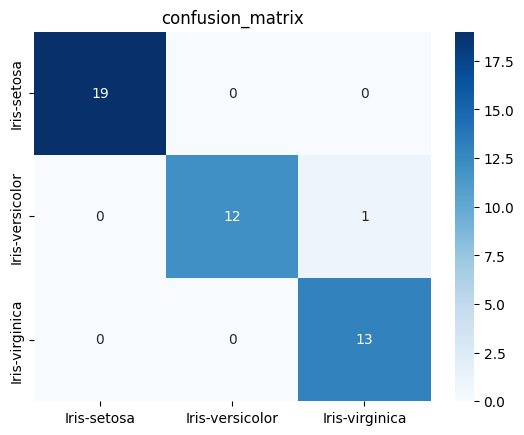

In [47]:
class_names = le.classes_

plt.Figure(figsize=(8,6))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, annot=True, cmap="Blues")
plt.title("confusion_matrix")
plt.show()